## Домашнее задание к лекции «Задачи классификации и кластеризации»

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

#### Построение модели LDA

In [2]:
# загрузка тестовых данных
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df_class = data.target

In [3]:
# модель
X = df[['sepal length (cm)', 'sepal width (cm)']]
Y = df_class

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=80)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)

Y_pred = lda.predict(X_test)

In [4]:
# точность прогноза
accuracy_score(Y_test, Y_pred)

0.868421052631579

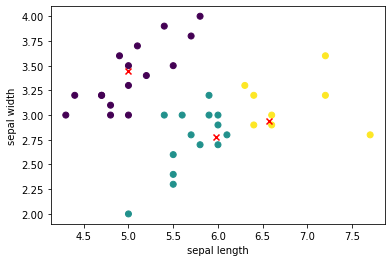

In [5]:
# предсказания
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=Y_pred)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='red', marker='x')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

#### Выбор кластеров методом K-средних

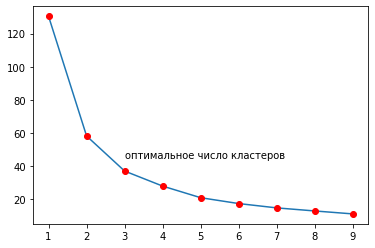

In [6]:
inertia = []
ks = range(1, 10)

for i in ks:
    k_means = KMeans(n_clusters=i)
    k_means.fit_predict(X)
    inertia.append(k_means.inertia_)
    
plt.plot(ks, inertia)
plt.plot(ks, inertia ,'ro')
plt.text(3, 45, 'оптимальное число кластеров')
plt.show()

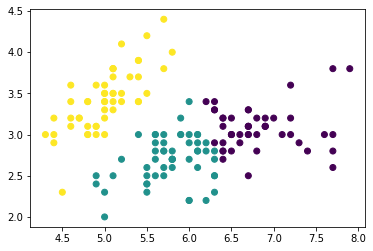

In [7]:
k_means = KMeans(n_clusters=3)
clusters = k_means.fit_predict(X)
plt.scatter(X['sepal length (cm)'], X['sepal width (cm)'], c=clusters)
plt.show()